<a href="https://colab.research.google.com/github/mirzafaradiba01/Machine-Learning/blob/main/3A_18_Mirza_Priscilla_Faradiba_Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : MIRZA PRISCILLA FARADIBA**

**KELAS : TI-3A**

**NO.ABSEN : 18**

**MATERI : Convolutional Neural Network (CNN)**

#PRAKTIKUM 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/ML/dataset.zip', 'r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/ML')

###Langkah 1 - Import Library

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

###Langkah 2 - Pra Pengolahan Data

Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


###Langkah 3 - Pembuatan Model CNN

Langkah 3.1.  - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 50s 149ms/step - loss: 0.6464 - accuracy: 0.6199 - val_loss: 0.6311 - val_accuracy: 0.6465
Epoch 2/25
250/250 [==============================] - 36s 146ms/step - loss: 0.5907 - accuracy: 0.6884 - val_loss: 0.5464 - val_accuracy: 0.7260
Epoch 3/25
250/250 [==============================] - 39s 155ms/step - loss: 0.5476 - accuracy: 0.7205 - val_loss: 0.5660 - val_accuracy: 0.7185
Epoch 4/25
250/250 [==============================] - 42s 167ms/step - loss: 0.5198 - accuracy: 0.7480 - val_loss: 0.5914 - val_accuracy: 0.7215
Epoch 5/25
250/250 [==============================] - 37s 149ms/step - loss: 0.5076 - accuracy: 0.7509 - val_loss: 0.4893 - val_accuracy: 0.7715
Epoch 6/25
250/250 [==============================] - 37s 147ms/step - loss: 0.4816 - accuracy: 0.7630 - val_loss: 0.5412 - val_accuracy: 0.7375
Epoch 7/25
250/250 [==============================] - 36s 146ms/step - loss: 0.4774 - accuracy: 0.7691 - val_loss: 0.4777 - val_ac

###Langkah 5 - Prediksi dengan 1 Citra

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/ML/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 282ms/step


#PRAKTIKUM

**Klasifikasi Multi-label dengan Data CIFAT**

###Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

###Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


###Langkah 3 - Verifikasi Data

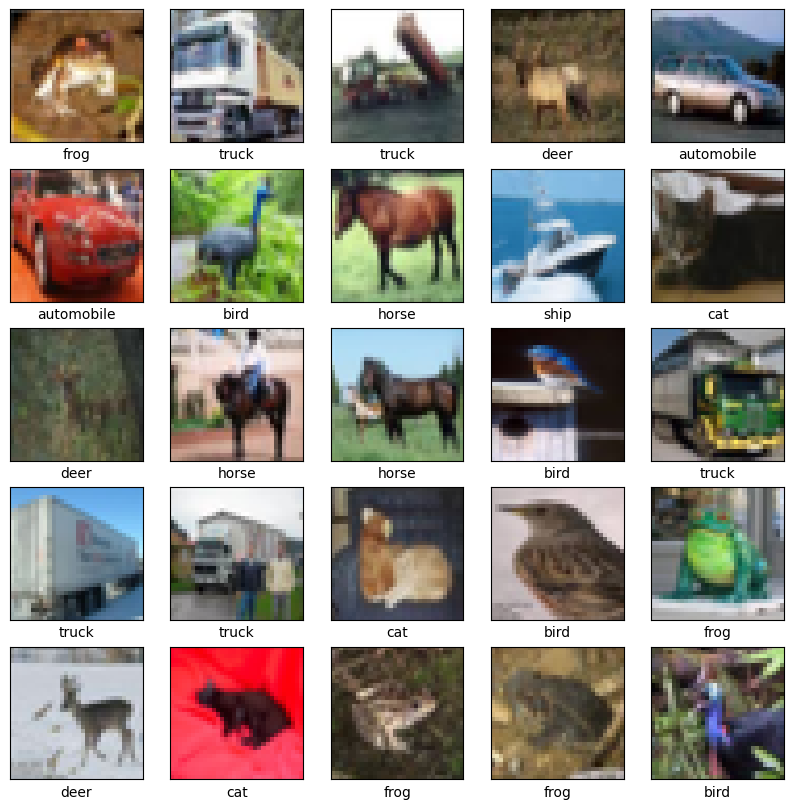

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

###Langkah 4 - Buat Model CNN

Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5253 - accuracy: 0.4465 - val_loss: 1.2768 - val_accuracy: 0.5361
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1545 - accuracy: 0.5920 - val_loss: 1.1082 - val_accuracy: 0.6072
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0020 - accuracy: 0.6462 - val_loss: 0.9885 - val_accuracy: 0.6539
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9069 - accuracy: 0.6829 - val_loss: 0.9871 - val_accuracy: 0.6687
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8298 - accuracy: 0.7101 - val_loss: 0.9689 - val_accuracy: 0.6685
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7720 - accuracy: 0.7310 - val_loss: 0.8869 - val_accuracy: 0.6929
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7234 - accuracy: 0.7468 - val_loss: 0.8459 - val_accuracy

###Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.8870 - accuracy: 0.7061 - 701ms/epoch - 2ms/step


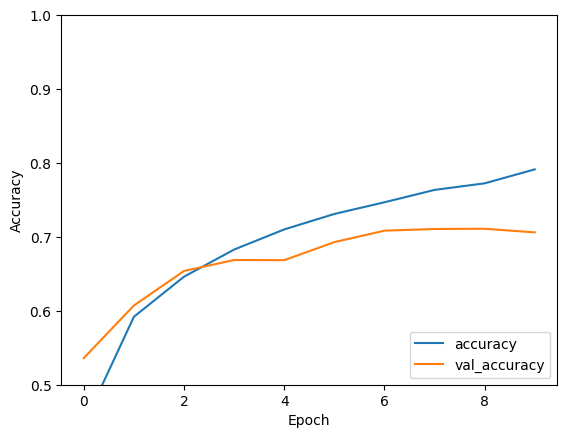

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

###Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.7060999870300293


#TUGAS

####Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

Langkah 1 : Import Library

In [4]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

Langkah 2: Memuat dataset CIFAR 1O

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


Langkah 3 : Normalisasi data dan konversi label ke vektor one-hot encoded

In [6]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Langkah 4: Memisahkan data latih menjadi data latih dan data validasi

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Langkah 5: Mendefinisikan model Convolutional Neural Network (CNN)

In [8]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()
    return model


Langkah 6: Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data

In [9]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

Langkah 7: Membuat model dan mengompilasi

In [10]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

Langkah 8: Melatih model dengan ImageDataGenerator

In [11]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 53s 70ms/step - loss: 2.2652 - accuracy: 0.1431 - val_loss: 1.9066 - val_accuracy: 0.2521
Epoch 2/50
625/625 [==============================] - 43s 69ms/step - loss: 1.8533 - accuracy: 0.2946 - val_loss: 1.5645 - val_accuracy: 0.4076
Epoch 3/50
625/625 [==============================] - 44s 70ms/step - loss: 1.6217 - accuracy: 0.4020 - val_loss: 1.3683 - val_accuracy: 0.5028
Epoch 4/50
625/625 [==============================] - 44s 70ms/step - loss: 1.4652 - accuracy: 0.4760 - val_loss: 1.3502 - val_accuracy: 0.5185
Epoch 5/50
625/625 [==============================] - 38s 61ms/step - loss: 1.3574 - accuracy: 0.5275 - val_loss: 1.1759 - val_accuracy: 0.5972
Epoch 6/50
625/625 [==============================] - 54s 86ms/step - loss: 1.2958 - accuracy: 0.5540 - val_loss: 1.0684 - val_accuracy: 0.6287
Epoch 7/50
625/625 [==============================] - 43s 69ms/step - loss: 1.2198 - accuracy: 0.5823 - val_loss: 1.0045 - val_accuracy:

Langkah 9: Mengevaluasi model pada set tes

In [12]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.6086 - accuracy: 0.8379


Langkah 10: Melakukan prediksi

<Axes: >

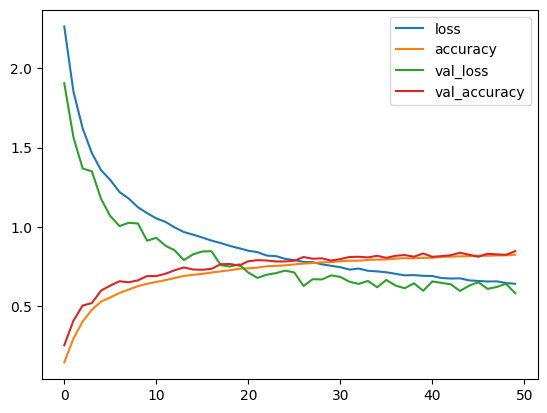

In [13]:
pd.DataFrame(history.history).plot()

Langkah 11: Tampilkan laporan klasifikasi

In [14]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       0.91      0.93      0.92      1000
           2       0.82      0.75      0.78      1000
           3       0.79      0.59      0.67      1000
           4       0.78      0.83      0.81      1000
           5       0.81      0.75      0.78      1000
           6       0.82      0.92      0.87      1000
           7       0.78      0.93      0.85      1000
           8       0.93      0.91      0.92      1000
           9       0.89      0.89      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Langkah 12: Menampilkan visualisasi hasil prediksi

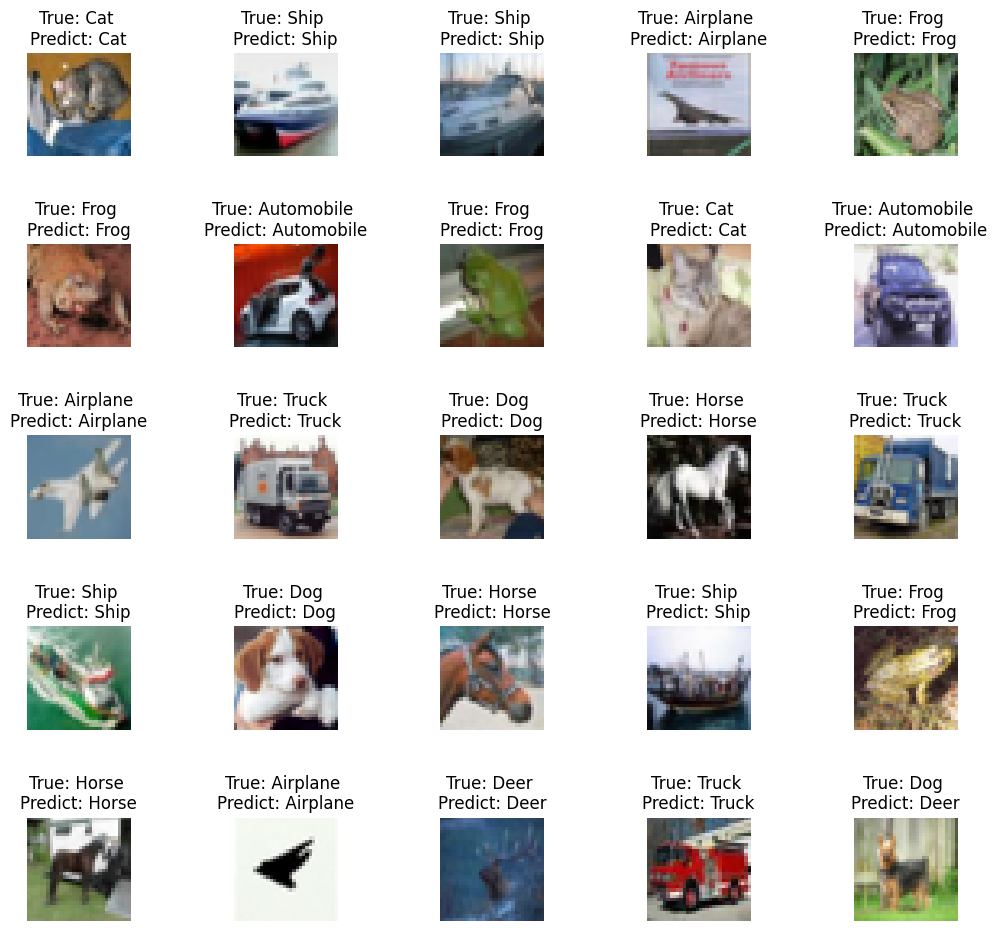

In [15]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

###Buatlah model CNN untuk klasifikasi dataset MNIST

Langkah 1: Memuat Dataset MNIST

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


Langkah 2: Normalisasi Gambar ke Rentang [0, 1]

In [18]:
# Normalisasi gambar ke rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

Langkah 3: Mengonversi Label ke Format One-Hot Encoding

In [19]:
# Perbaikan: Mengimpor to_categorical dari tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Mengonversi label ke format one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

Langkah 4: Menampilkan Informasi tentang Dataset

In [20]:
# Menampilkan informasi tentang dataset
print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


Langkah 5: Membangun Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Langkah 6: Mengompilasi Model

In [22]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Langkah 7: Menampilkan Ringkasan Model

In [23]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Langkah 8: Melatih Model

In [24]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2, validation_split=0.3)

Epoch 1/10
329/329 - 4s - loss: 0.3738 - accuracy: 0.8840 - val_loss: 0.0918 - val_accuracy: 0.9731 - 4s/epoch - 12ms/step
Epoch 2/10
329/329 - 2s - loss: 0.1003 - accuracy: 0.9698 - val_loss: 0.0549 - val_accuracy: 0.9838 - 2s/epoch - 6ms/step
Epoch 3/10
329/329 - 2s - loss: 0.0678 - accuracy: 0.9804 - val_loss: 0.0472 - val_accuracy: 0.9861 - 2s/epoch - 5ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0526 - accuracy: 0.9843 - val_loss: 0.0446 - val_accuracy: 0.9869 - 2s/epoch - 5ms/step
Epoch 5/10
329/329 - 2s - loss: 0.0439 - accuracy: 0.9874 - val_loss: 0.0471 - val_accuracy: 0.9859 - 2s/epoch - 6ms/step
Epoch 6/10
329/329 - 2s - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0476 - val_accuracy: 0.9867 - 2s/epoch - 7ms/step
Epoch 7/10
329/329 - 2s - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0398 - val_accuracy: 0.9887 - 2s/epoch - 6ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0393 - val_accuracy: 0.9897 - 2s/epoch - 5ms/step
Epoch 9/10
329/329 - 2s

Langkah 9: Plot Sejarah Pelatihan

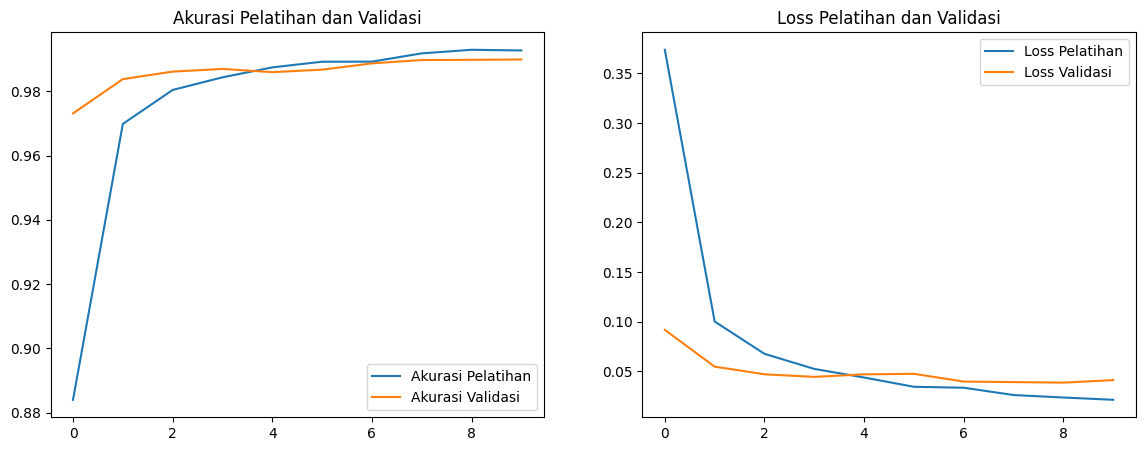

In [25]:
import matplotlib.pyplot as plt

# Plot sejarah pelatihan
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()

Langkah 10: Evaluasi Model pada Kumpulan Data Uji

In [26]:
# Evaluasi model pada kumpulan data uji
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 0.03186816722154617
Akurasi Validasi: 0.9912999868392944


Langkah 11: Menghasilkan Nilai Prediksi pada Kumpulan Data Uji

In [27]:
# Menghasilkan nilai prediksi pada kumpulan data uji
y_pred_enc = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Langkah 12: Mendekode Nilai Prediksi

In [28]:
# Mendekode nilai prediksi
y_pred = [np.argmax(i) for i in y_pred_enc]

Langkah 13: Menampilkan Laporan Klasifikasi

In [29]:
# Menampilkan laporan klasifikasi
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Langkah 14: Membuat Matriks Konfusi dan Menampilkannya dengan Heatmap

Text(58.222222222222214, 0.5, 'Aktual')

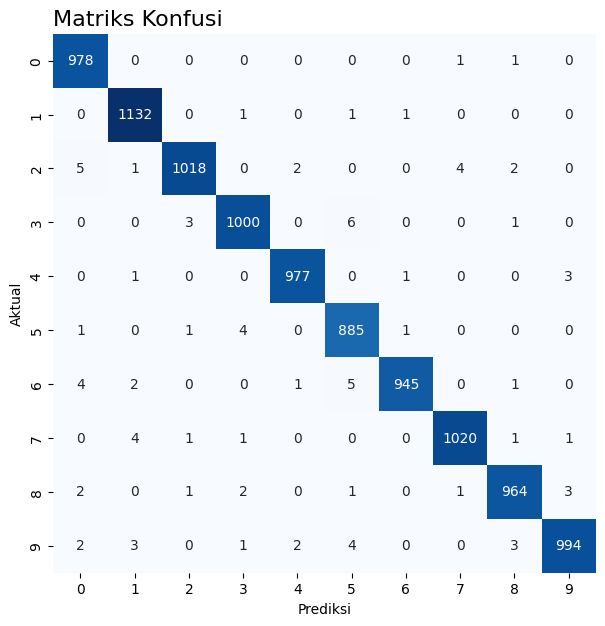

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks konfusi dan menampilkannya dengan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')

Langkah 15: Menampilkan Target yang Diprediksi pada Setiap Gambar (Label di atas gambar adalah label yang diprediksi)

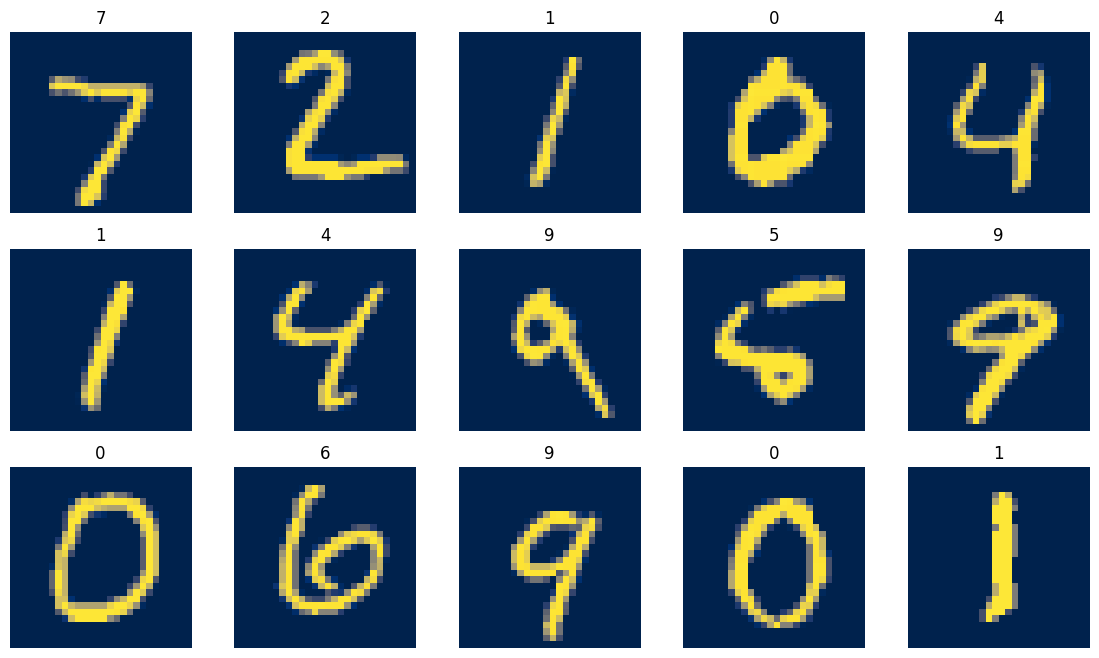

In [32]:
# Menampilkan target yang diprediksi pada setiap gambar
# (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(14, 8))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')